# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

/Users/garrettyamane/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


offer_id  campaign            varietal  min_qty  discount       origin  \
0         1   January              Malbec       72        56       France   
1         2   January          Pinot Noir       72        17       France   
2         3  February           Espumante      144        32       Oregon   
3         4  February           Champagne       72        48       France   
4         5  February  Cabernet Sauvignon      144        44  New Zealand   

   past_peak  
0      False  
1      False  
2       True  
3       True  
4       True

We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

customer_name  offer_id  n
0         Smith         2  1
1         Smith        24  1
2       Johnson        17  1
3       Johnson        24  1
4       Johnson        26  1

## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn

# Merge the 'df_offers' table with 'df_transactions' based on the offer_id, keeping all unmatched offers (offers that 
# were not responded to by any customer)
df_responses = pd.merge(df_offers, df_transactions, on='offer_id', how='left')

# Pivot 'df_responses' by grouping by 'customer_name', changing all values where they did respond to 'n=1', and 
# filling values where they didn't respond to 0
df_responses = df_responses.pivot_table(values='n', index=['customer_name'], columns=['offer_id'], fill_value=0)
df_responses

offer_id       1   2   3   4   5   6   7   8   9   10  ...  23  24  25  26  \
customer_name                                          ...                   
Adams           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Allen           0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   
Anderson        0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   
Bailey          0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Baker           0   0   0   0   0   0   1   0   0   1  ...   0   0   0   0   
Barnes          0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   
Bell            0   1   0   0   0   0   0   0   0   0  ...   0   1   0   1   
Bennett         0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   
Brooks          0   0   1   0   0   0   0   1   0   0  ...   0   0   0   0   
Brown           0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Butler          1   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   
Campbell        0   1   0   0   0   0   0   0   0   0  ...   0   1   0   1   
Carter          0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Clark           0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   
Collins         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Cook            0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   
Cooper          0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   
Cox             0   1   0   0   0   0   0   0   0   0  ...   0   1   0   1   
Cruz            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Davis           0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   
Diaz            0   0   0   0   0   0   1   1   0   0  ...   0   0   0   0   
Edwards         0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   
Evans           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Fisher          1   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Flores          0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   
Foster          1   0   0   0   0   0   0   0   1   0  ...   1   0   0   0   
Garcia          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Gomez           0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   
Gonzalez        0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   
Gray            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
Reed            0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   
Reyes           0   0   0   0   0   0   0   0   1   0  ...   1   0   0   0   
Richardson      0   0   1   0   0   1   0   0   0   0  ...   0   0   0   0   
Rivera          0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Roberts         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Robinson        0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Rodriguez       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   1   
Rogers          0   0   1   0   0   0   1   1   0   0  ...   0   0   0   0   
Ross            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
Russell         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   
Sanchez         0   0   0   1   1   0   0   0   0   0  ...   0   0   0   1   
Sanders         1   0   0   1   1   1   0   0   1   0  ...   0   0   1   1   
Scott           0   0   0   0   0   1   0   0   0   0  ...   1   0   0   0   
Smith           0   1   0   0   0   0   0   0   0   0  ...   0   1   0   0   
Stewart         0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   
Sullivan        0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   
Taylor          0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
Thomas          1   0   0   1   0   0   0   0   1   0  ...   0   0   0   1   
Thompson        0   0 

## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

<strong>RESPONSE</strong>: Regarding the values of <strong><em>SS</em></strong>, I believe that lower values of <strong><em>SS</em></strong> represent better clusterings. <strong><em>SS</em></strong> represents the sum of the squares of the distances from each data point to their respective centroid. If the <strong><em>SS</em></strong> values are lower, this means that the data points are located closer to their corresponding cluster centroid. As a result, we have better approximations for each centroid and thus have better cluster representations for the data.

In [6]:
# your turn
x_cols = df_responses.to_numpy()
x_cols

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

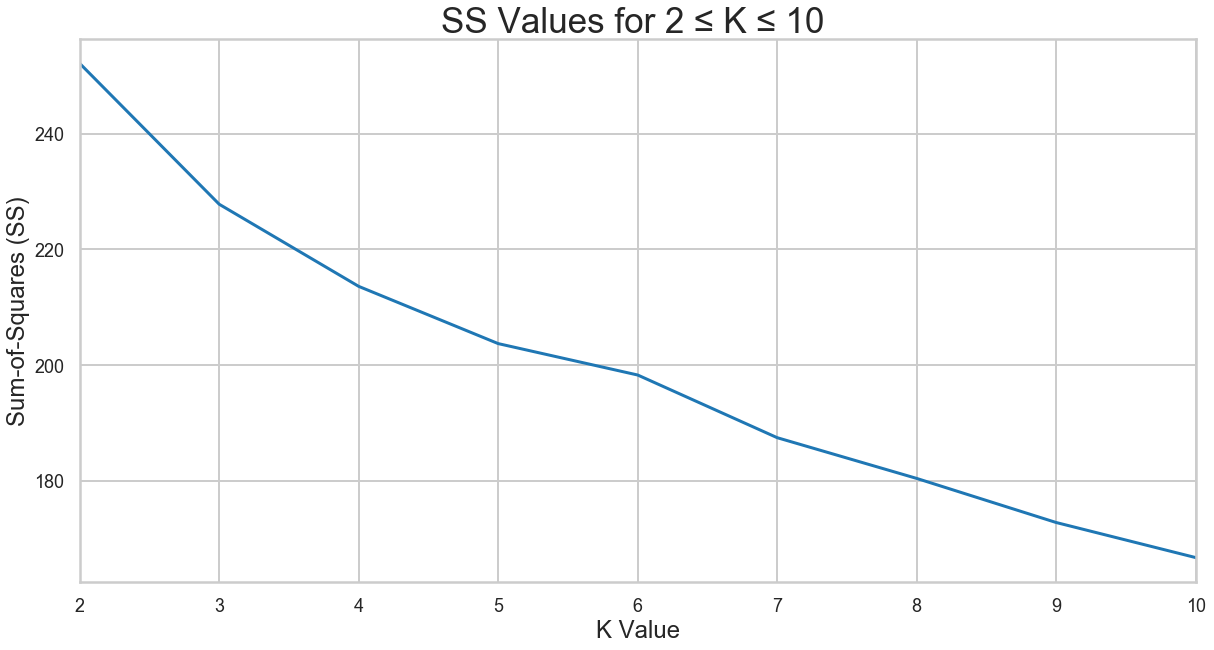

In [7]:
# your turn
from sklearn.cluster import KMeans
import numpy as np

kmeans_model = KMeans()
kmeans_model.fit(x_cols)

ss_vals = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x_cols)
    ss_vals.append(kmeans_model.inertia_)
    
plt.figure(figsize=(20,10))
    
plt.plot(range(2, 11), ss_vals)
plt.xlim([2,10])
plt.xlabel('K Value')
plt.ylabel('Sum-of-Squares (SS)')
plt.xticks(range(2,11), size = 18)
plt.yticks(size = 18)
plt.title('SS Values for 2 ≤ K ≤ 10 ', size=35)
plt.show()


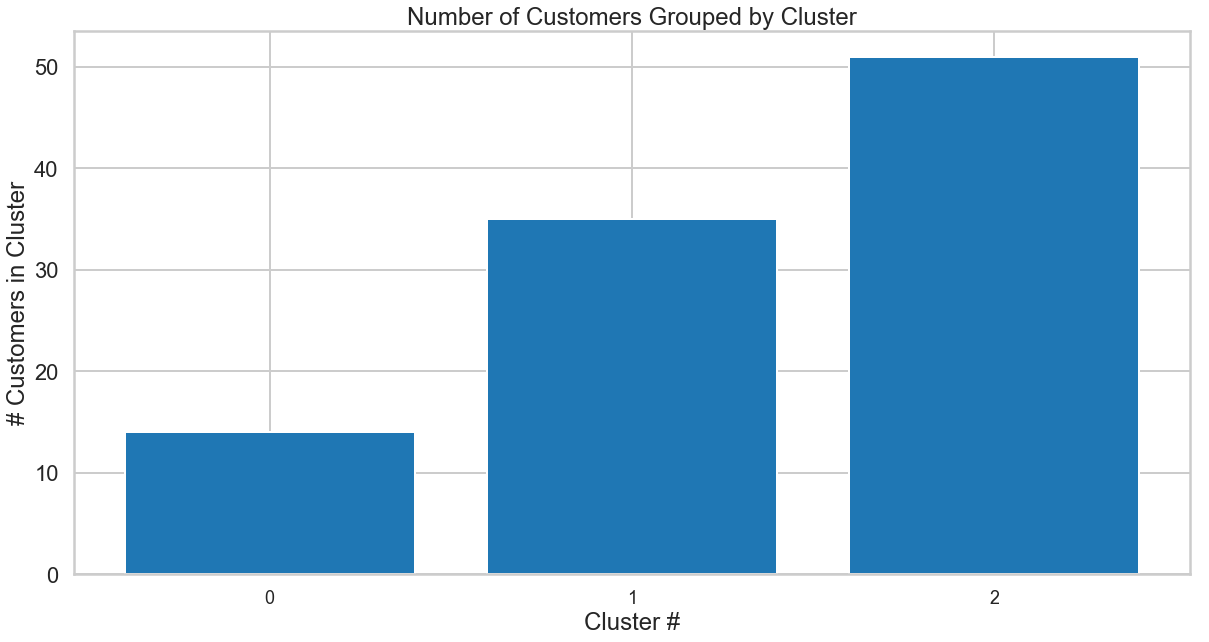

In [8]:
# your turn

# Create a kmeans model with my choice of the optimal number of clusters (3)
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x_cols)

# Create a dictionary mapping each cluster number to how manmy points are in that corresponding cluster
num_points = {i: len(np.where(kmeans_model.labels_ == i)[0]) for i in range(kmeans_model.n_clusters)}

# Plot the bar chort
plt.figure(figsize=(20,10))
plt.bar(list(num_points.keys()), list(num_points.values()),  align='center')
plt.xlabel('Cluster #')
plt.ylabel('# Customers in Cluster')
plt.xticks(range(0, 3), size = 18)
plt.title('Number of Customers Grouped by Cluster')
plt.show()

<strong>RESPONSE</strong>: The best K value based off the plot and using the Elbow Method would be 3. This is because at this point, we can see that the slope of the line plot begins leveling off following K=3. Using the elbow method was a challenge, however, due to the fact that it was not very clear from the line chart where the slope began leveling off. Another choice that I could have made was K=8. The ambiguity between choosing the 'optimal' cluster number made using the Elbow Method difficult.

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For k = 2 The average silhouette_score is : 0.09365573283492713
For k = 3 The average silhouette_score is : 0.11889942863638556
For k = 4 The average silhouette_score is : 0.12347053919571699
For k = 5 The average silhouette_score is : 0.14092516241984757
For k = 6 The average silhouette_score is : 0.1371798939109807
For k = 7 The average silhouette_score is : 0.1161092456616906
For k = 8 The average silhouette_score is : 0.11339573832632867
For k = 9 The average silhouette_score is : 0.12505960527779877
For k = 10 The average silhouette_score is : 0.11928332134753233


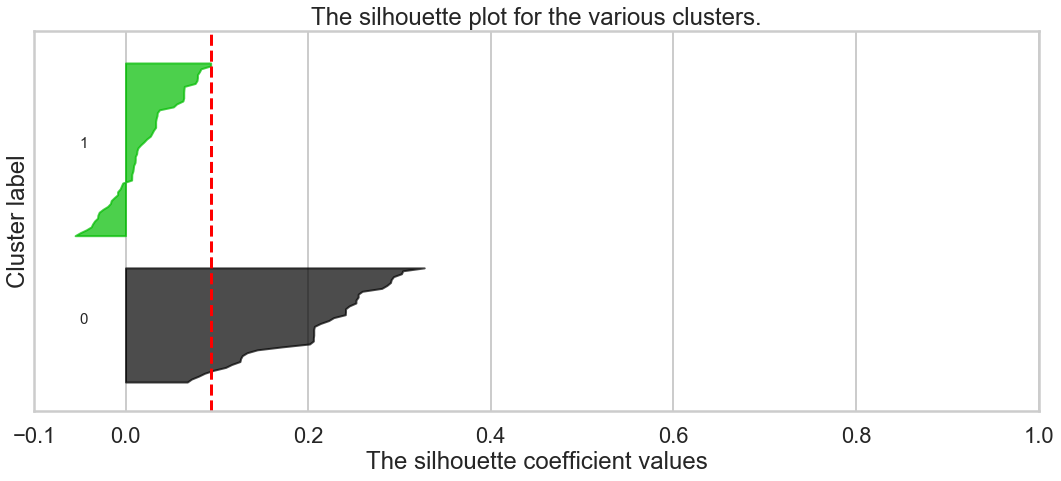

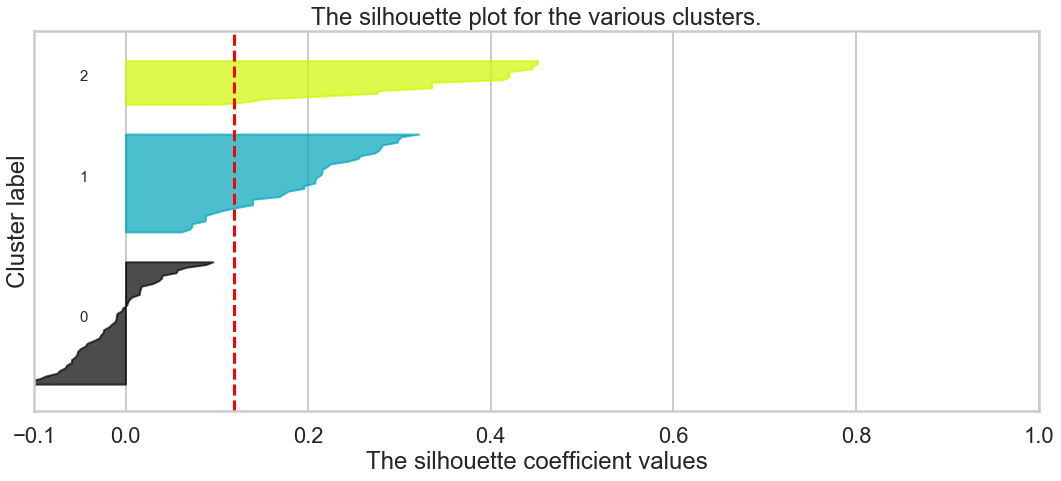

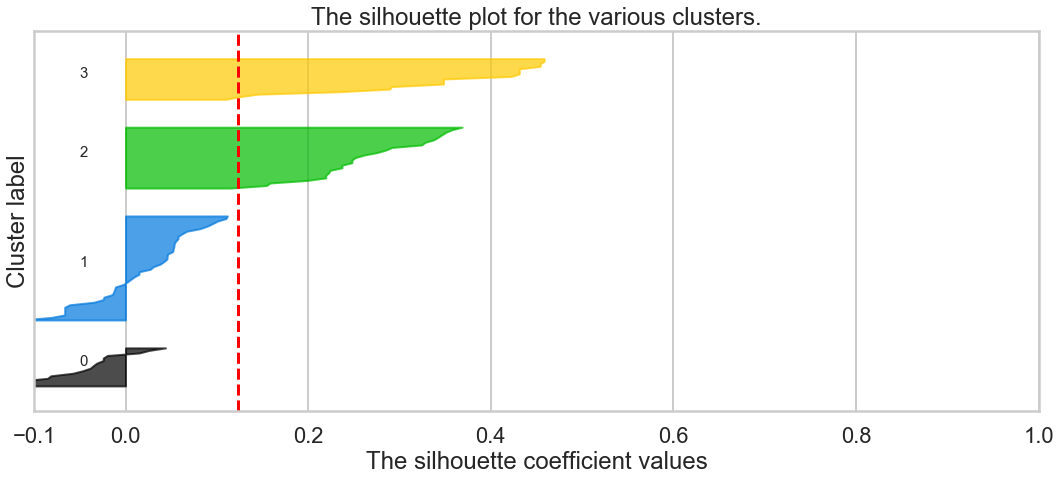

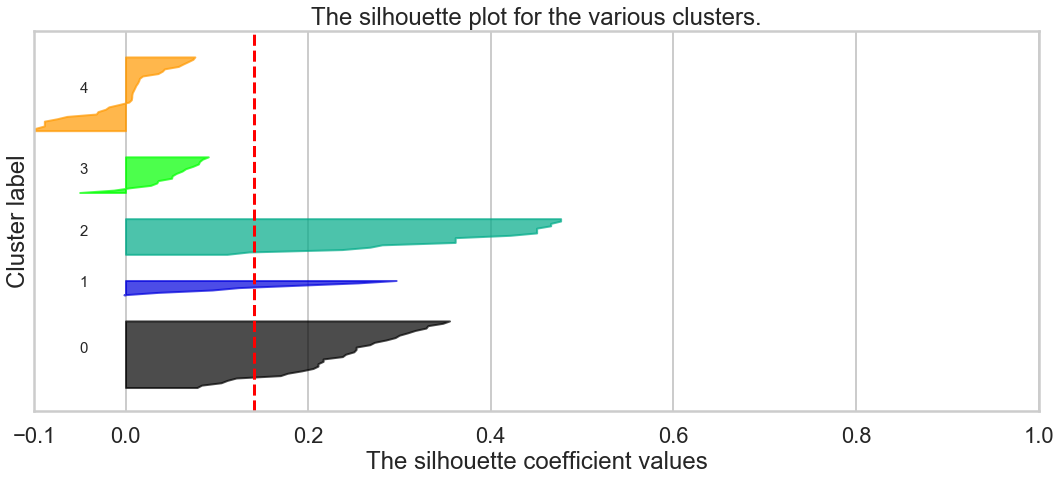

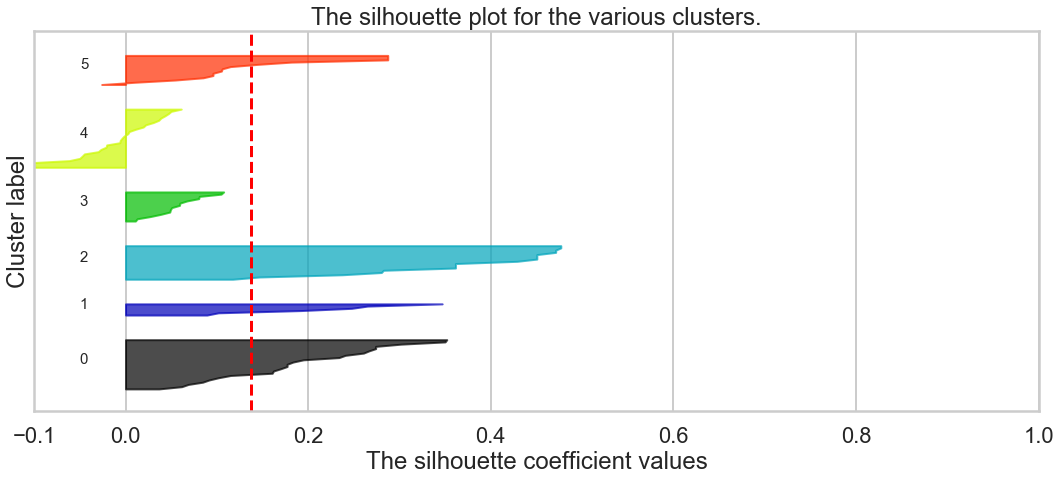

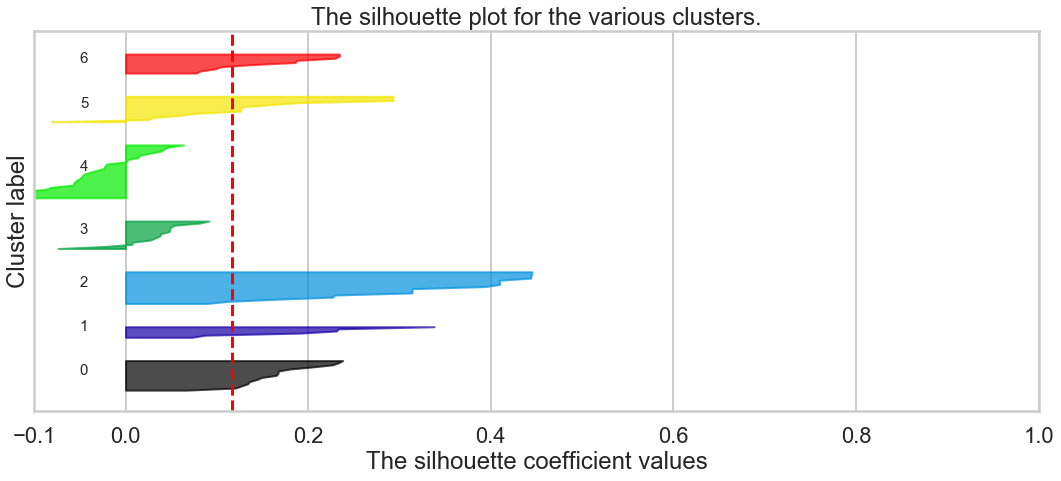

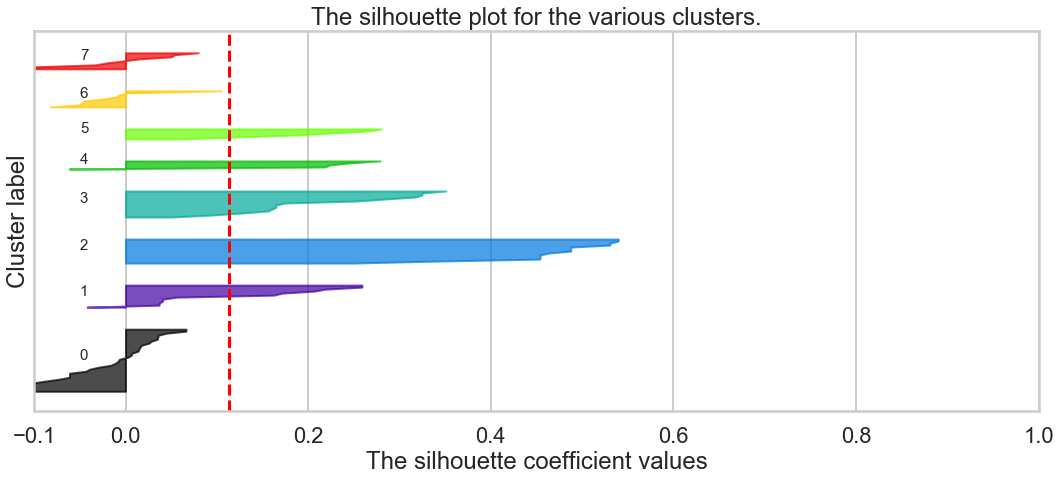

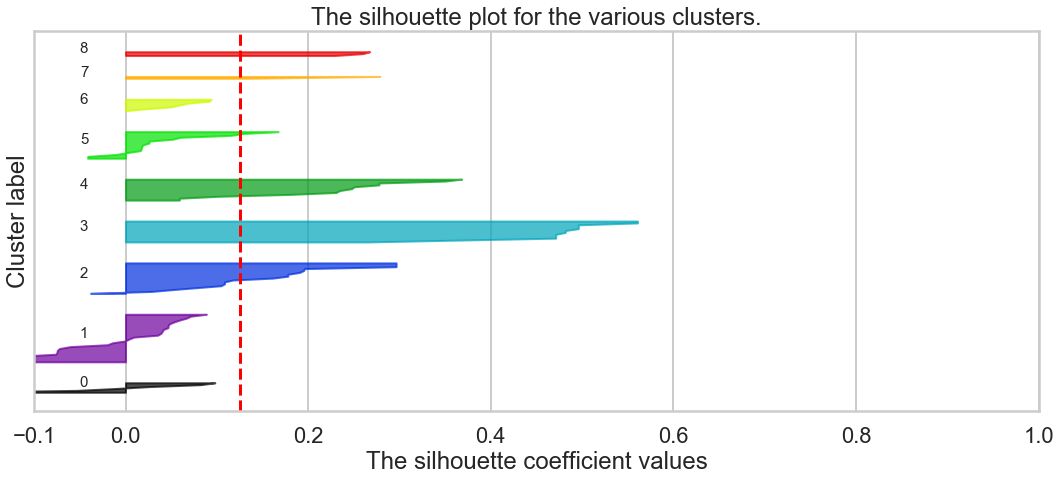

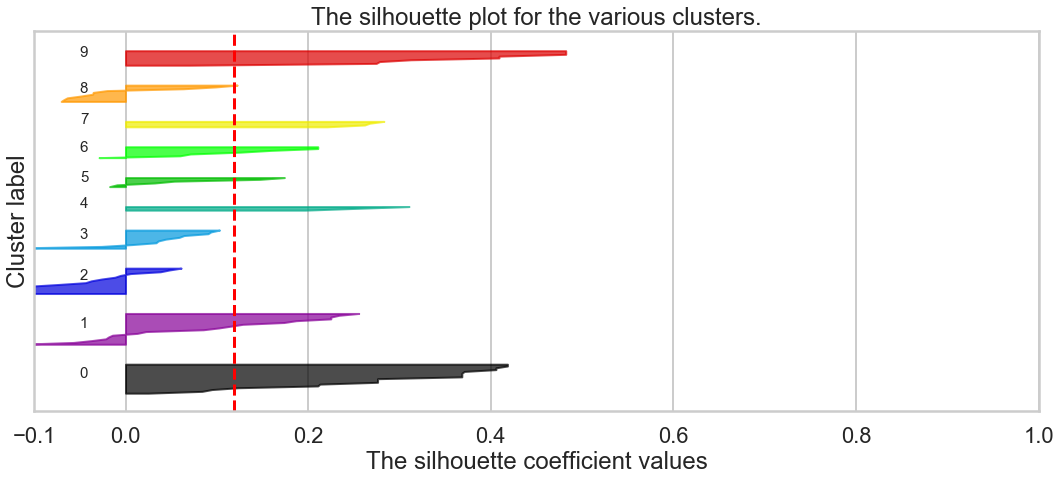

In [9]:
# Your turn.
# The article from "https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html" was 
# used to help implement the loop

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

k_vals = range(2,11)
silhouette_scores = []

for num_clusters in k_vals:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (num_clusters + 1) * 10])

    # Initialize the clusterer with k value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For k =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=15)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


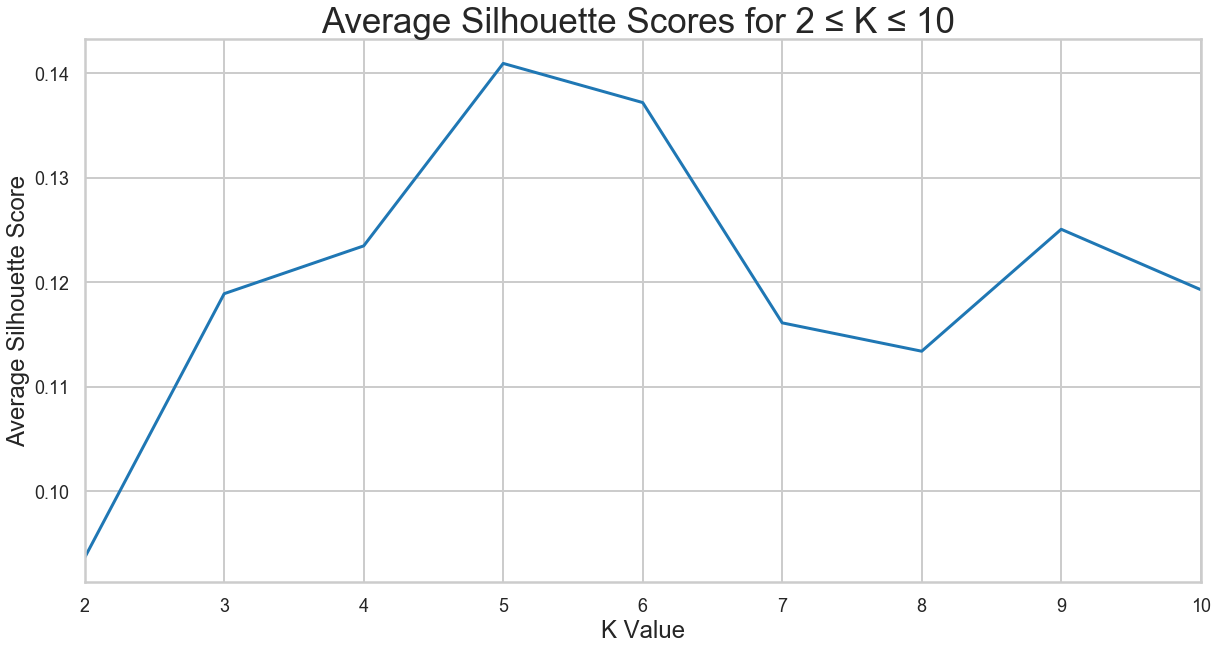

In [10]:
# your turn
plt.figure(figsize=(20,10))
    
plt.plot(range(2, 11), silhouette_scores)
plt.xlim([2,10])
plt.xlabel('K Value')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2,11), size = 18)
plt.yticks(size = 18)
plt.title('Average Silhouette Scores for 2 ≤ K ≤ 10 ', size=35)
plt.show()

<strong>RESPONSE:</strong> The plot suggest we should choose a K value of 5. There is a clear peak in the plot where the average silhouette score is highest, and makes it easier to choose the optimal K value compared to the Elbow method. The Elbow method had some ambiguity in terms of what threshold we should hold our decision to, whereas using the Silhouette Method helped me clearly make a decision based on the definitive peak of the plot.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

<strong>Build KMeans Model with 3 Clusters<strong/>

In [11]:
#your turn
from sklearn.decomposition import PCA

# Build KMeans model initialized with 3 clusters
model = KMeans(n_clusters = 3)
model.fit_predict(x_cols)

# Get customer names and cluster assignments
customers = list(df_responses.index)
cluster_assignments = model.labels_

# Build PCA model with 2 components, and fit the model to the customer data
pca = PCA(n_components = 2, random_state=42)
principal_components = pca.fit_transform(x_cols)

<strong>Create the Dataframe<strong/>

In [12]:
# Assign customer names, cluster assignments, and the 2 PCA components to a dictionary of data for the dataframe
data = {}
data["customer_name"] = customers
data["cluster_id"] = cluster_assignments
data["x"] = principal_components[:,0]
data["y"] = principal_components[:,1]


# Create the dataframe from the above data
df_3 = pd.DataFrame(data = data)
df_3

customer_name  cluster_id         x         y
0          Adams           1  1.007580  0.108215
1          Allen           2 -0.287539  0.044715
2       Anderson           0 -0.392032  1.038391
3         Bailey           1  0.699477 -0.022542
4          Baker           1  0.088183 -0.471695
5         Barnes           2 -0.485282 -0.725503
6           Bell           0 -0.591941  1.506500
7        Bennett           1  0.661732  0.090308
8         Brooks           2 -0.118943 -0.577499
9          Brown           1  1.079827 -0.007488
10        Butler           2 -0.240431 -0.617026
11      Campbell           0 -0.522247  1.231406
12        Carter           1  1.260763 -0.014255
13         Clark           2 -0.579221 -0.420475
14       Collins           2  0.193998  0.010306
15          Cook           0 -0.392032  1.038391
16        Cooper           2 -0.406276 -0.045771
17           Cox           0 -0.591941  1.506500
18          Cruz           1  0.736155  0.117752
19         Davis           2 -0.349057 -0.267081
20          Diaz           1  1.412247 -0.123874
21       Edwards           1  0.181048 -0.020653
22         Evans           2 -0.371485 -0.348007
23        Fisher           2 -0.509137 -0.687321
24        Flores           0 -0.239706  0.911844
25        Foster           2 -0.782355 -0.518475
26        Garcia           2 -0.299666  0.006964
27         Gomez           2 -0.412830 -0.012199
28      Gonzalez           2 -0.339146 -0.185585
29          Gray           0 -0.330960  0.607623
..           ...         ...       ...       ...
70          Reed           2 -0.252065  0.100076
71         Reyes           2 -0.266650  0.097532
72    Richardson           2 -0.443190 -0.634112
73        Rivera           1  0.564060  0.056861
74       Roberts           2 -0.202978 -0.134566
75      Robinson           1  0.672985  0.081453
76     Rodriguez           0 -0.403273  0.786296
77        Rogers           1  0.377123 -0.791758
78          Ross           1  0.210842  0.123742
79       Russell           0 -0.273058  0.593281
80       Sanchez           2 -1.077511 -0.229397
81       Sanders           2 -1.274329 -0.114296
82         Scott           2 -0.418022 -0.206640
83         Smith           0 -0.300227  0.829765
84       Stewart           1  1.068574  0.001366
85      Sullivan           1  0.733742  0.058949
86        Taylor           1  1.351253 -0.017026
87        Thomas           2 -1.041879  0.122314
88      Thompson           2  0.135104  0.036918
89        Torres           1  0.281381  0.075254
90        Turner           2 -0.632199 -0.651152
91        Walker           1  0.600737  0.197156
92          Ward           2 -0.226293  0.036352
93        Watson           1  0.672985  0.081453
94         White           2 -0.050484 -0.452883
95      Williams           2 -0.151666 -0.587844
96        Wilson           1  0.688224 -0.013688
97          Wood           2 -0.551215 -0.395670
98        Wright           2 -0.489805 -0.383307
99         Young           2 -0.881994 -1.041788

[100 rows x 4 columns]

<strong>Build Scatter Plot for K = 3<strong/>

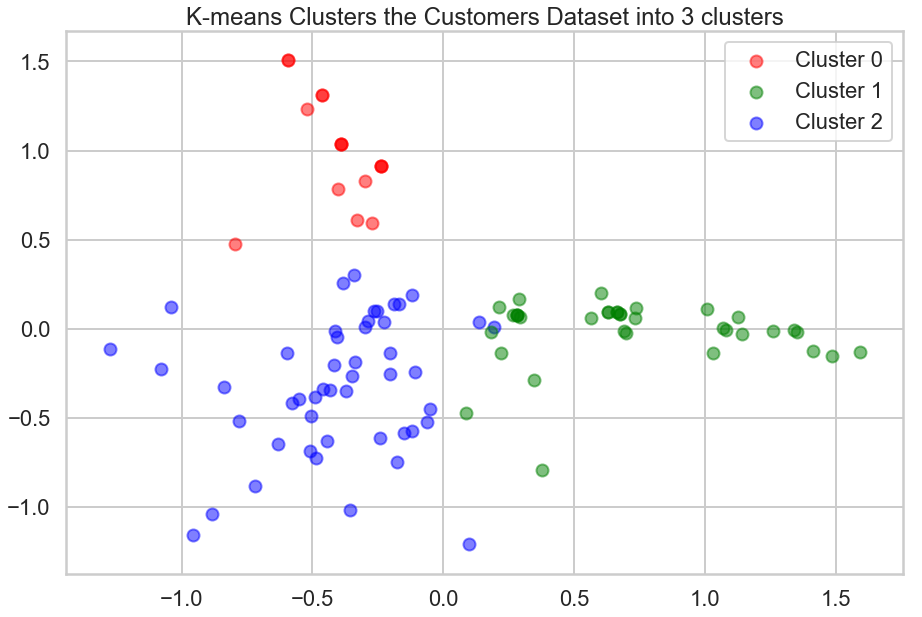

In [14]:
plt.figure(figsize=(15,10))
for i in range(0,100):
    if list(df_3['cluster_id'])[i] == 0:
        c0 = plt.scatter(df_3['x'][i], df_3['y'][i], c='r', alpha=0.5)
    elif list(df_3['cluster_id'])[i] == 1:
        c1 = plt.scatter(df_3['x'][i], df_3['y'][i],c='g', alpha=0.5)
    elif list(df_3['cluster_id'])[i] == 2:
        c2 = plt.scatter(df_3['x'][i], df_3['y'][i],c='b', alpha=0.5)
plt.legend([c0, c1, c2],['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('K-means Clusters the Customers Dataset into 3 clusters')
plt.show()


<strong>Build KMeans Model with 5 Clusters for Comparison<strong/>

In [15]:
# Build KMeans model initialized with 5 clusters
model_5Clusters = KMeans(n_clusters = 5)
model_5Clusters.fit_predict(x_cols)

# Get Cluster assignments for K=5
cluster_assignments = model_5Clusters.labels_

<strong>Build the New Dataframe for K=5 Clusters<strong/>

In [17]:
# Assign customer names, cluster assignments, and the 2 PCA components to a dictionary of data for the dataframe
data = {}
data["customer_name"] = customers
data["cluster_id"] = cluster_assignments
data["x"] = principal_components[:,0]
data["y"] = principal_components[:,1]


# Create the dataframe from the above data
df_5 = pd.DataFrame(data = data)
df_5

customer_name  cluster_id         x         y
0          Adams           2  1.007580  0.108215
1          Allen           0 -0.287539  0.044715
2       Anderson           1 -0.392032  1.038391
3         Bailey           2  0.699477 -0.022542
4          Baker           3  0.088183 -0.471695
5         Barnes           3 -0.485282 -0.725503
6           Bell           1 -0.591941  1.506500
7        Bennett           2  0.661732  0.090308
8         Brooks           0 -0.118943 -0.577499
9          Brown           2  1.079827 -0.007488
10        Butler           0 -0.240431 -0.617026
11      Campbell           1 -0.522247  1.231406
12        Carter           2  1.260763 -0.014255
13         Clark           3 -0.579221 -0.420475
14       Collins           0  0.193998  0.010306
15          Cook           1 -0.392032  1.038391
16        Cooper           0 -0.406276 -0.045771
17           Cox           1 -0.591941  1.506500
18          Cruz           2  0.736155  0.117752
19         Davis           0 -0.349057 -0.267081
20          Diaz           2  1.412247 -0.123874
21       Edwards           0  0.181048 -0.020653
22         Evans           0 -0.371485 -0.348007
23        Fisher           3 -0.509137 -0.687321
24        Flores           1 -0.239706  0.911844
25        Foster           4 -0.782355 -0.518475
26        Garcia           4 -0.299666  0.006964
27         Gomez           0 -0.412830 -0.012199
28      Gonzalez           3 -0.339146 -0.185585
29          Gray           0 -0.330960  0.607623
..           ...         ...       ...       ...
70          Reed           4 -0.252065  0.100076
71         Reyes           0 -0.266650  0.097532
72    Richardson           0 -0.443190 -0.634112
73        Rivera           2  0.564060  0.056861
74       Roberts           3 -0.202978 -0.134566
75      Robinson           2  0.672985  0.081453
76     Rodriguez           1 -0.403273  0.786296
77        Rogers           0  0.377123 -0.791758
78          Ross           0  0.210842  0.123742
79       Russell           0 -0.273058  0.593281
80       Sanchez           4 -1.077511 -0.229397
81       Sanders           0 -1.274329 -0.114296
82         Scott           4 -0.418022 -0.206640
83         Smith           1 -0.300227  0.829765
84       Stewart           2  1.068574  0.001366
85      Sullivan           2  0.733742  0.058949
86        Taylor           2  1.351253 -0.017026
87        Thomas           4 -1.041879  0.122314
88      Thompson           0  0.135104  0.036918
89        Torres           0  0.281381  0.075254
90        Turner           3 -0.632199 -0.651152
91        Walker           2  0.600737  0.197156
92          Ward           0 -0.226293  0.036352
93        Watson           2  0.672985  0.081453
94         White           4 -0.050484 -0.452883
95      Williams           3 -0.151666 -0.587844
96        Wilson           2  0.688224 -0.013688
97          Wood           3 -0.551215 -0.395670
98        Wright           0 -0.489805 -0.383307
99         Young           3 -0.881994 -1.041788

[100 rows x 4 columns]

<strong>Build Scatter Plot for K = 5<strong/>

<Figure size 432x288 with 0 Axes>

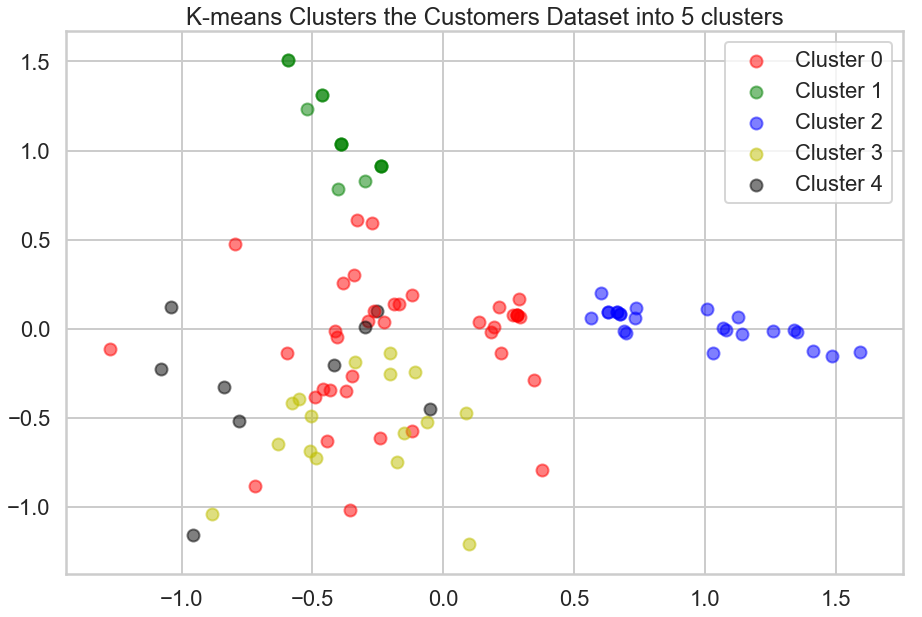

In [18]:
plt.clf()
plt.figure(figsize=(15,10))
for i in range(0,100):
    if list(df_5['cluster_id'])[i] == 0:
        c0 = plt.scatter(df_5['x'][i], df_5['y'][i], c='r', alpha=0.5)
    elif list(df_5['cluster_id'])[i] == 1:
        c1 = plt.scatter(df_5['x'][i], df_5['y'][i],c='g', alpha=0.5)
    elif list(df_5['cluster_id'])[i] == 2:
        c2 = plt.scatter(df_5['x'][i], df_5['y'][i],c='b', alpha=0.5)
    elif list(df_5['cluster_id'])[i] == 3:
        c3 = plt.scatter(df_5['x'][i], df_5['y'][i],c='y', alpha=0.5)
    elif list(df_5['cluster_id'])[i] == 4:
        c4 = plt.scatter(df_5['x'][i], df_5['y'][i],c='k', alpha=0.5)
plt.legend([c0, c1, c2, c3, c4],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('K-means Clusters the Customers Dataset into 5 clusters')

plt.show()

<strong>RESPONSE:</strong> Firstly, I will explain the two different methods that I used to choose my K value and the differences that are shown in the two figures. Initially, I chose the K=3 when using the Elbow method. Even though there was some ambiguity (discussed earlier), after running PCA on the data and plotting the resulting clusters from K=3, it appears that this choice was decent in terms of what clusters were formed. However, using the Elbow method still left some doubts due to the fact that there wasn't a clear "elbow" in the plot of the SS values. This led me to labeling the data with K=5 to test my choice from the Silhouette Method. Using the Silhouette Method made my choice a little more clear due to the fact that there was a definitive 'peak' in average silhouette scores for K in range from 2 to 10. However, the resulting cluster plot wasn't what I expected. There are some overlying data points that look like they could mislabeled. The cluster boundary lines were not very clear and this made me realize an important detail about the silhouette scores. Although at K=5 there is a peak, every value was less than 0.25, meaning that "no substantial structure has been found." Many of the choices we make when observing and grouping such data can be arbitrary, and it is important to make sure that we compare multiple different methods to determine the most optimal one to use when deciding things such as the number of clusters to use for unsupervised learning problems. K could be  different values depending on the method that I choose to use and the value I decide to go with, and I belive it is very important to take everything into consideration and examine the results of the decisions that I make.

The original data contains 100 different data points (individual customers) and 32 different features (32 different possible offers that they could have responded to). These 32 features are treated as individual promotions, which creates a wide variance in terms of the different values that the features can take on. PCA is very helpful in this situation by allowing us to see buyer patterns through reducing the dimensionality of the promotion data down to 2 dimensions, allowing me to plot customer behavior on a 2-D plane and grouping based on the results. Rather than purely observing promotions as individual entities, treating all the promotions as one entity highlights buyer patterns that are clear in the above figures when using the right number of clusters.



What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<strong>Create a dataframe with all original data merged with the corresponding cluster that the data was put into for K=3</strong>

In [39]:
df_transactions
df_offers
df_merged_original = pd.merge(df_transactions, df_offers, on='offer_id')
df_merged_clustering = pd.merge(df_merged_original, df_3, on='customer_name')
df_merged_clustering

customer_name  offer_id  n   campaign            varietal  min_qty  \
0           Smith         2  1    January          Pinot Noir       72   
1           Smith        24  1  September          Pinot Noir        6   
2       Rodriguez         2  1    January          Pinot Noir       72   
3       Rodriguez        26  1    October          Pinot Noir      144   
4          Martin         2  1    January          Pinot Noir       72   
5          Martin        28  1   November  Cabernet Sauvignon       12   
6          Martin        11  1        May           Champagne       72   
7         Jackson         2  1    January          Pinot Noir       72   
8         Jackson        22  1     August           Champagne       72   
9         Jackson        15  1       June  Cabernet Sauvignon      144   
10        Jackson         1  1    January              Malbec       72   
11        Jackson        11  1        May           Champagne       72   
12       Campbell         2  1    January          Pinot Noir       72   
13       Campbell        24  1  September          Pinot Noir        6   
14       Campbell        26  1    October          Pinot Noir      144   
15       Mitchell         2  1    January          Pinot Noir       72   
16       Mitchell         1  1    January              Malbec       72   
17       Peterson         2  1    January          Pinot Noir       72   
18       Peterson        26  1    October          Pinot Noir      144   
19       Peterson        10  1      April            Prosecco       72   
20       Peterson        23  1  September          Chardonnay      144   
21       Peterson         1  1    January              Malbec       72   
22       Peterson        27  1    October           Champagne       72   
23           Bell         2  1    January          Pinot Noir       72   
24           Bell        24  1  September          Pinot Noir        6   
25           Bell        17  1       July          Pinot Noir       12   
26           Bell        26  1    October          Pinot Noir      144   
27            Cox         2  1    January          Pinot Noir       72   
28            Cox        24  1  September          Pinot Noir        6   
29            Cox        17  1       July          Pinot Noir       12   
..            ...       ... ..        ...                 ...      ...   
294         Scott         6  1      March            Prosecco      144   
295         Scott        14  1       June              Merlot       72   
296         Scott        23  1  September          Chardonnay      144   
297        Garcia        14  1       June              Merlot       72   
298        Garcia        15  1       June  Cabernet Sauvignon      144   
299          Reed        14  1       June              Merlot       72   
300          Reed         5  1   February  Cabernet Sauvignon      144   
301         Lopez        15  1       June  Cabernet Sauvignon      144   
302         Lopez         9  1      April          Chardonnay      144   
303         Lopez        11  1        May           Champagne       72   
304         Lopez        16  1       June              Merlot       72   
305         Lopez        27  1    October           Champagne       72   
306         Reyes        23  1  September          Chardonnay      144   
307         Reyes         9  1      April          Chardonnay      144   
308      Martinez        12  1        May            Prosecco       72   
309      Martinez        25  1    October  Cabernet Sauvignon       72   
310      Martinez        28  1   November  Cabernet Sauvignon       12   
311         Gomez        25  1    October  Cabernet Sauvignon       72   
312         Gomez        11  1        May           Champagne       72   
313         Gomez        32  1   December  Cabernet Sauvignon       72   
314         Gomez        20  1     August  Cabernet Sauvignon       72   
315        Cooper         4  1   February           Champagne       72   
316     

<strong>Count contribution of wine varietal and campaign in each cluster</strong>

In [42]:
df_merged_clustering.groupby('cluster_id')['varietal'].value_counts()

cluster_id  varietal          
0           Pinot Noir            37
            Prosecco               2
            Champagne              1
            Chardonnay             1
            Malbec                 1
            Merlot                 1
1           Espumante             32
            Prosecco              22
            Malbec                16
            Pinot Grigio          16
            Champagne              7
            Merlot                 6
            Cabernet Sauvignon     1
2           Champagne             73
            Cabernet Sauvignon    31
            Prosecco              19
            Malbec                15
            Chardonnay            14
            Merlot                13
            Espumante              8
            Pinot Noir             7
            Pinot Grigio           1
Name: varietal, dtype: int64

In [46]:
df_merged_clustering.groupby('cluster_id')['campaign'].value_counts()

cluster_id  campaign 
0           October      13
            September    13
            January       7
            July          7
            April         1
            June          1
            May           1
1           March        35
            December     17
            November     17
            July         15
            May           7
            April         3
            August        3
            February      2
            October       1
2           August       28
            December     26
            February     20
            June         19
            March        16
            May          16
            October      16
            April        13
            January      13
            November      6
            July          4
            September     4
Name: campaign, dtype: int64

<strong>RESPONSE:</strong> One interesting takeaway from the clustering of data is the variance in the varietal of wines in each cluster. Each cluster had one dominating type of wine that was bought. For example, in Cluster 2, majority of data points were offers relating to Champagne. By comparing this to the months that the offers were presented, it makes sense that champagne was most common in the months of August, December, and February. Events such as Christmas/New Year's and Valentine's Day are common holidays that people like to buy champagne for, so it is interesting to see the effects that the time of the year has on the types of wine that were most commonly bought.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

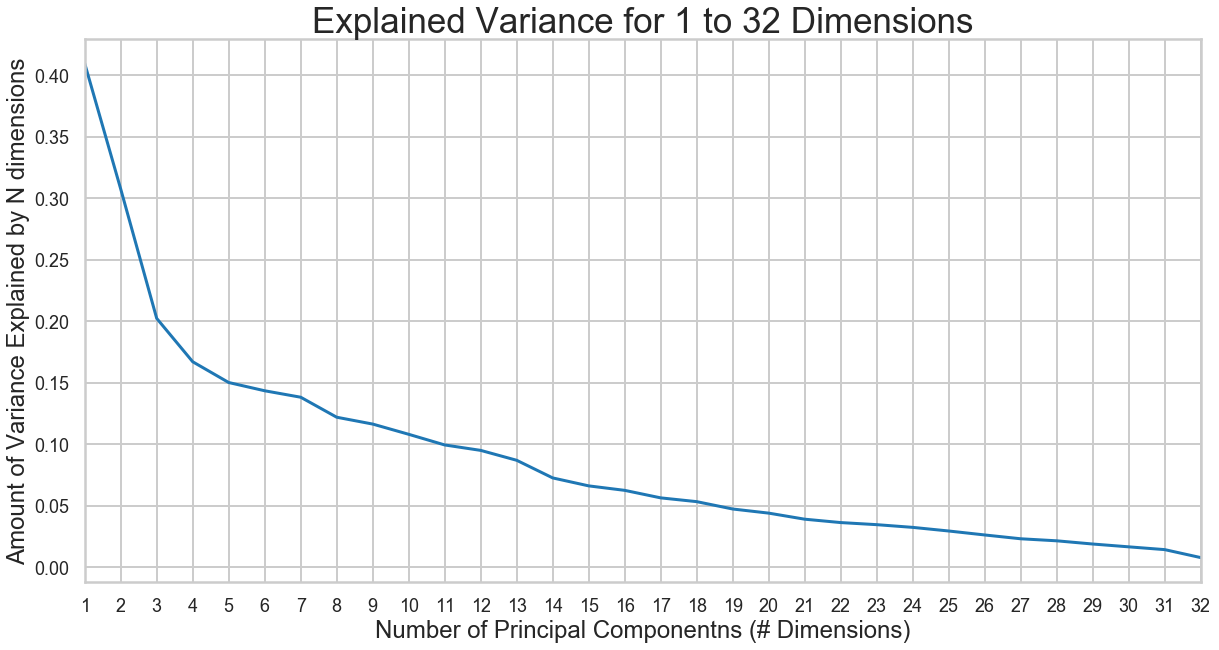

In [148]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
plt.figure(figsize=(20,10))
    
plt.plot(range(1, 33), pca.explained_variance_)
plt.xlim([1,32])
plt.xlabel('Number of Principal Componentns (# Dimensions)')
plt.ylabel('Amount of Variance Explained by N dimensions')
plt.xticks(range(1,33), size = 18)
plt.yticks(size = 18)
plt.title('Explained Variance for 1 to 32 Dimensions', size=35)
plt.show()


<strong>RESPONSE:</strong> using the Elbow Method on the explained variance plot, it appears that the optimal number of dimensions would be 4.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


<strong>RESPONSE:</strong> The way I approached this problem was to first cluster the dataset via each clustering algorithm. I then calculated the silhouette score for the resulting models that were built, while changing the values of parameters such as 'num_clusters' or 'damping value' to determine the optimal parameter for the corresponding model. Afterwards, I took the models with their best parameters and compared the four different algorithms to each other to determine their performances via the silhouette score to choose the algorithm that performed the beset (had the strongest clustering score). 

<strong>AFFINITY PROPAGATION</strong>

In [60]:
# Your turn
from sklearn.cluster import AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN
silhouette_scores = []

# AFFINITY PROPAGATION
damp_vals = [0.5, 0.6, 0.7, 0.8, 0.9]
ap_best_score = 0
best_damp = 0.5

for damp in damp_vals:
    ap = AffinityPropagation(damping=damp)
    ap_labels = ap.fit_predict(x_cols)
    
    silhouette_avg = silhouette_score(x_cols, ap_labels)
    silhouette_scores.append(silhouette_avg)
    if (silhouette_avg > ap_best_score):
        ap_best_score = silhouette_avg
        best_damp = damp
    print('The silhouette score for Affinity Propogation with damping factor', damp, 'is', silhouette_avg)
print('Best Score:', ap_best)
print('Damping Factor:', best_damp)

The silhouette score for Affinity Propogation with damping factor 0.5 is 0.12346523604478911
The silhouette score for Affinity Propogation with damping factor 0.6 is 0.12346523604478911
The silhouette score for Affinity Propogation with damping factor 0.7 is 0.12346523604478911
The silhouette score for Affinity Propogation with damping factor 0.8 is 0.08954554999885996
The silhouette score for Affinity Propogation with damping factor 0.9 is 0.08954554999885996
Best Score: 0.12346523604478911
Damping Factor: 0.5


<strong>SPECTRAL CLUSTERING</strong>

In [62]:
silhouette_scores = []

# SPECTRAL CLUSTERING
k_clusters = np.arange(2,11)
sc_best_score = 0
best_k = 2

for k in k_clusters:
    sc = SpectralClustering(n_clusters=k)
    sc_labels = sc.fit_predict(x_cols)
    
    silhouette_avg = silhouette_score(x_cols, sc_labels)
    silhouette_scores.append(silhouette_avg)
    if (silhouette_avg > sc_best_score):
        sc_best_score = silhouette_avg
        best_k = k
    print('The silhouette score for Spectral Clustering with K value', k, 'is', silhouette_avg)
print('Best Score:', sc_best_score)
print('K Value:', best_k)

The silhouette score for Spectral Clustering with K value 2 is 0.07631909829627558
The silhouette score for Spectral Clustering with K value 3 is 0.10611539040197304
The silhouette score for Spectral Clustering with K value 4 is 0.08627893400734331
The silhouette score for Spectral Clustering with K value 5 is 0.09993402587297352
The silhouette score for Spectral Clustering with K value 6 is 0.1004756066996975
The silhouette score for Spectral Clustering with K value 7 is 0.07598262399017487
The silhouette score for Spectral Clustering with K value 8 is 0.09821292483774906
The silhouette score for Spectral Clustering with K value 9 is 0.0952513437419327
The silhouette score for Spectral Clustering with K value 10 is 0.0842964596261956
Best Score: 0.10611539040197304
K Value: 3


<strong>AGGLOMERATIVE CLUSTERING</strong>

In [64]:
silhouette_scores = []

# AGGLOMERATIVE CLUSTERING
k_clusters = np.arange(2,11)
ag_best_score = 0
best_k = 2

for k in k_clusters:
    ag = AgglomerativeClustering(n_clusters=k)
    ag_labels = sc.fit_predict(x_cols)
    
    silhouette_avg = silhouette_score(x_cols, ag_labels)
    silhouette_scores.append(silhouette_avg)
    if (silhouette_avg > ag_best_score):
        ag_best_score = silhouette_avg
        best_k = k
    print('The silhouette score for Agglomerative Clustering with K value', k, 'is', silhouette_avg)
print('Best Score:', ag_best_score)
print('K Value:', best_k)

The silhouette score for Agglomerative Clustering with K value 2 is 0.11362434958026191
The silhouette score for Agglomerative Clustering with K value 3 is 0.09632588322942627
The silhouette score for Agglomerative Clustering with K value 4 is 0.09477187506715305
The silhouette score for Agglomerative Clustering with K value 5 is 0.07138054143697131
The silhouette score for Agglomerative Clustering with K value 6 is 0.09333759713821534
The silhouette score for Agglomerative Clustering with K value 7 is 0.09172459249602309
The silhouette score for Agglomerative Clustering with K value 8 is 0.09870035962502449
The silhouette score for Agglomerative Clustering with K value 9 is 0.09761198032048739
The silhouette score for Agglomerative Clustering with K value 10 is 0.09298254107679407
Best Score: 0.11362434958026191
K Value: 2


<strong>DBSCAN</strong>

In [67]:
silhouette_scores = []

# DBSCAN
test_min_samples = [1, 2, 3, 4, 5]
dbscan_best_score = 0
best_min_sample = 1

for s in test_min_samples:
    dbscan = DBSCAN(min_samples=s)
    dbscan_labels = sc.fit_predict(x_cols)
    
    silhouette_avg = silhouette_score(x_cols, dbscan_labels)
    silhouette_scores.append(silhouette_avg)
    if (silhouette_avg > dbscan_best_score):
        dbscan_best_score = silhouette_avg
        best_min_sample = s
    print('The silhouette score for DBSCAN with min sample size', s, 'is', silhouette_avg)
print('Best Score:', dbscan_best_score)
print('Min Sample Size:', best_min_sample)

The silhouette score for DBSCAN with min sample size 1 is 0.09833097628232956
The silhouette score for DBSCAN with min sample size 2 is 0.09122457747491529
The silhouette score for DBSCAN with min sample size 3 is 0.0887928718812766
The silhouette score for DBSCAN with min sample size 4 is 0.07283538497716509
The silhouette score for DBSCAN with min sample size 5 is 0.09351790258396958
Best Score: 0.09833097628232956
Min Sample Size: 1


<strong>RESPONSE:</strong> From these clustering algorithms, none of them appear to perform that well. All of their best silhouette scores are below 0.25, meaning that no substantial structure was found. The algorithm that performed the best was Affinity Propagation. I belive this performed the best because I do not have to specify the K value (number of clusters) in advance. According to the algorithm, points are clustered together based on their similarity. Rather than having to specify which predefined cluster a data point belongs to, clusters form themselves from data similarity and this flexibility allows for the best performance.